# Contents



[Data Load](#data-load) \
[Check for outlier with boxplot](#check-for-outlier-with-boxplot) \
[Exploratory Data Analysis](#exploratory-data-analysis) \
[Relationship with Target variable(Heart Attack Risk)](#relationship-with-target-variableheart-attack-risk) \
[Correlation Matrix](#correlation-matrix) \
[Data Preprocessing](#data-preprocessing) \
[One-hot encoding ](#one-hot-encoding) \
[Splitting the data into training and testing](#splitting-the-data-into-training-and-testing) \
[Noramlizing the data](#noramlizing-the-data) \
[logistic Regression model](#logistic-regression-model) \
[Random Forest](#random-forest) \
[The Comparison](#the-comparison) 


# Heart Attack Risk Predictive Analytics

Heart attacks, medically known as myocardial infarctions, present a critical global health concern due to their significant morbidity and mortality rates. Various risk factors contribute to the development of heart attacks, encompassing both modifiable and non-modifiable elements. Non-modifiable risk factors include age, gender, and family history of cardiovascular disease, while modifiable factors entail smoking, unhealthy diet, physical inactivity, hypertension, high cholesterol, obesity, diabetes, and excessive alcohol consumption. Lifestyle modifications, such as adopting a heart-healthy diet, engaging in regular physical activity, quitting smoking, and managing stress, can significantly mitigate heart attack risk. Additionally, timely medical interventions, medication adherence, and ongoing monitoring are crucial aspects of heart attack prevention and management. Public health efforts should focus on increasing awareness of these risk factors and promoting proactive measures to reduce the incidence of heart attacks and enhance overall cardiovascular health.

> [Access Heart Attack Risk Dashboard from Here](https://public.tableau.com/app/profile/ihtisham.mehmood/viz/HeartAttackRiskDashboard_16964318022960/Dashboard1)

> [Access SQL source Code From here](https://github.com/Ihtishammehmood/SQL-server/tree/1f893f44abcaa0a80d8b3fe23baf7d87d5631e07/Heart%20Attack%20Risk-Data%20analysis%20with%20SQL%20server)

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt

### Data Load

In [22]:
df = pd.read_excel(r'C:\Users\UMER COMPUTERS\Desktop\Jupyter notebook\heart_attack.xlsx')

In [23]:
## getting Rid of unwanted columns

column_drop = ['Patient ID']
df = df.drop(columns=column_drop)

In [24]:
df.head()

,Age Group,Age,Gender,Cholesterol,Systolic BP,Diastolic BP,Heart Rate,Diabetes,Family History,Smoking,...,Sedentary Hours Per Day,Income,BMI,Triglycerides( mg/dL),Physical Activity per week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,Emerging adults,18,Male,396,110,101,45,0,0,1,...,10.322567,138696,31.714872,445,3,6,United Kingdom,Europe,Northern Hemisphere,0
1,Emerging adults,18,Female,214,179,88,68,0,0,0,...,5.714521,96215,18.314298,129,6,9,Colombia,South America,Northern Hemisphere,1
2,Emerging adults,18,Female,353,159,108,46,0,0,0,...,2.056841,82682,21.906630,455,0,8,France,Europe,Northern Hemisphere,0
3,Emerging adults,18,Female,356,137,64,48,0,0,0,...,0.171178,249273,22.620809,492,6,6,South Korea,Asia,Northern Hemisphere,1
4,Emerging adults,18,Male,163,142,67,51,1,0,1,...,1.042636,186141,23.426227,614,2,4,Colombia,South America,Northern Hemisphere,1


### Check for outlier with boxplot

A box plot, also known as a box-and-whisker plot, is a graphical representation that displays the distribution, central tendency, and potential outliers within a dataset. It provides a visual summary of key statistical measures, including the median, quartiles, and potential outliers.

0.02849756715938935
-1.213755003151685
count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64


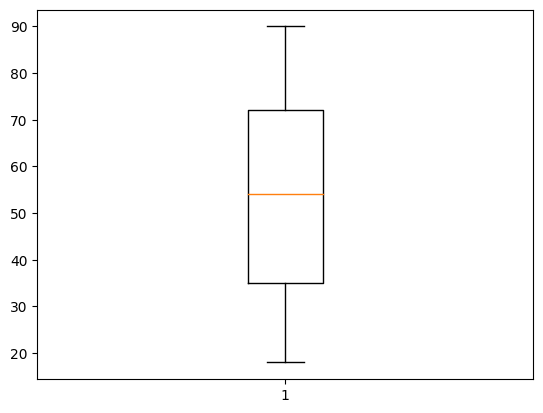

-0.0009547396917188235
-1.1802462965046843
count    8763.000000
mean      259.877211
std        80.863276
min       120.000000
25%       192.000000
50%       259.000000
75%       330.000000
max       400.000000
Name: Cholesterol, dtype: float64


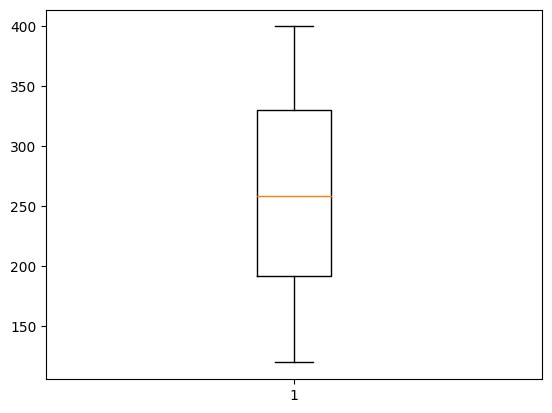

-0.0026612183962124473
-1.2206213060473428
count    8763.000000
mean      135.075659
std        26.349976
min        90.000000
25%       112.000000
50%       135.000000
75%       158.000000
max       180.000000
Name: Systolic BP, dtype: float64


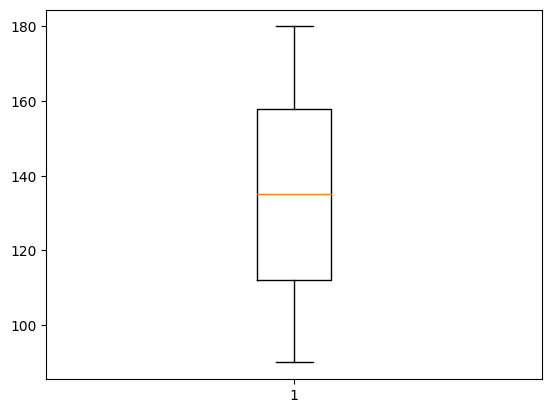

-0.023374840776208872
-1.206448340348921
count    8763.000000
mean       85.156111
std        14.676565
min        60.000000
25%        72.000000
50%        85.000000
75%        98.000000
max       110.000000
Name: Diastolic BP, dtype: float64


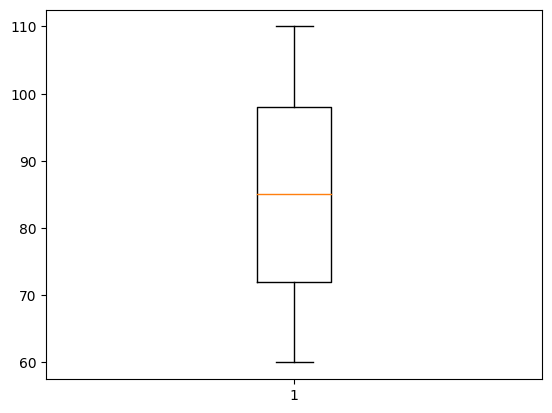

-0.003227185887356273
-1.2111804280811362
count    8763.000000
mean       75.021682
std        20.550948
min        40.000000
25%        57.000000
50%        75.000000
75%        93.000000
max       110.000000
Name: Heart Rate, dtype: float64


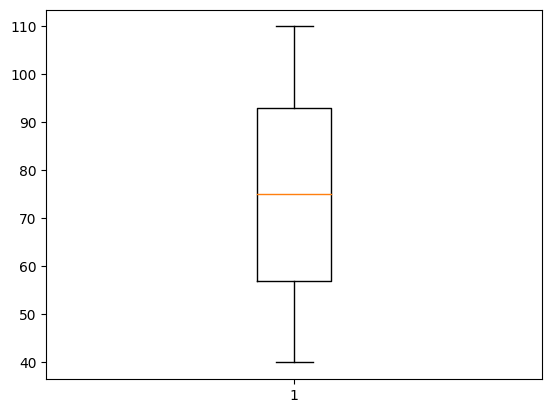

-0.6396473228492687
-1.591214521091592
count    8763.000000
mean        0.652288
std         0.476271
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Diabetes, dtype: float64


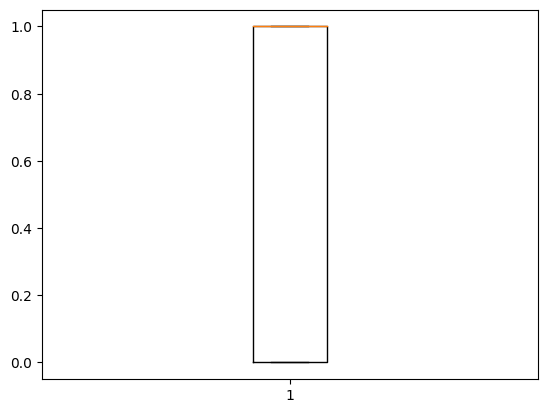

0.02808015051365113
-1.9996679461505842
count    8763.000000
mean        0.492982
std         0.499979
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Family History, dtype: float64


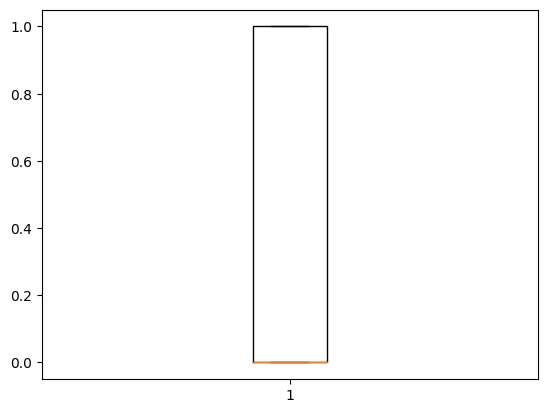

-2.609778353706119
4.812041266846713
count    8763.000000
mean        0.896839
std         0.304186
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Smoking, dtype: float64


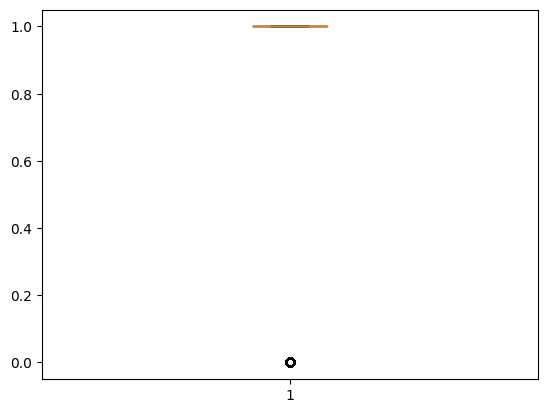

-0.00570680863834554
-2.0004240459050404
count    8763.000000
mean        0.501426
std         0.500026
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Obesity, dtype: float64


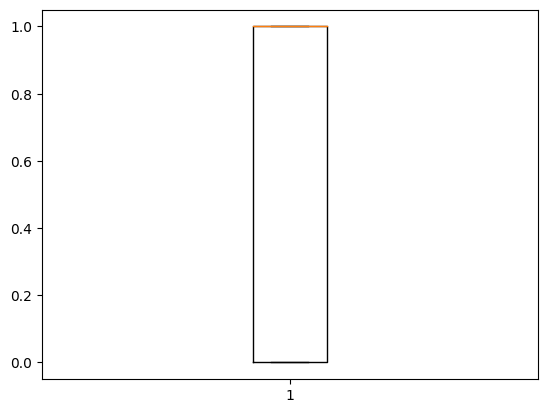

-0.4001736338255108
-1.8402811265665098
count    8763.000000
mean        0.598083
std         0.490313
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Alcohol Consumption, dtype: float64


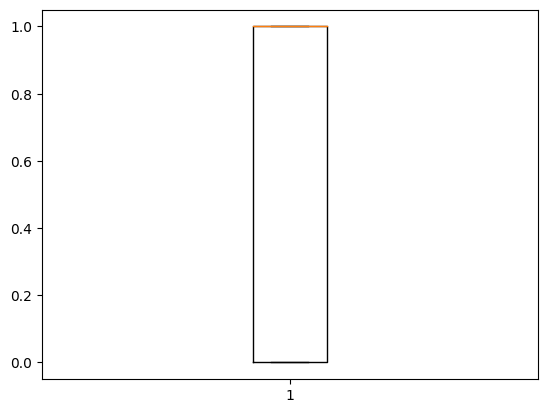

-0.016387022492201888
-1.203341649588606
count    8763.000000
mean       10.014284
std         5.783745
min         0.002442
25%         4.981579
50%        10.069559
75%        15.050018
max        19.998709
Name: Exercise Hours Per Week, dtype: float64


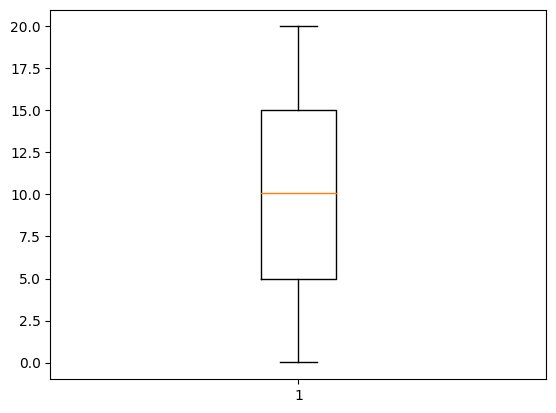

0.01666439164827216
-2.000178855660523
count    8763.000000
mean        0.495835
std         0.500011
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Previous Heart Problems, dtype: float64


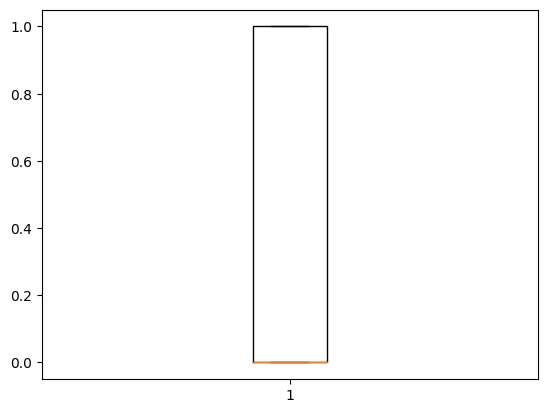

0.0066199073309999214
-2.0004127878273463
count    8763.000000
mean        0.498345
std         0.500026
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Medication Use, dtype: float64


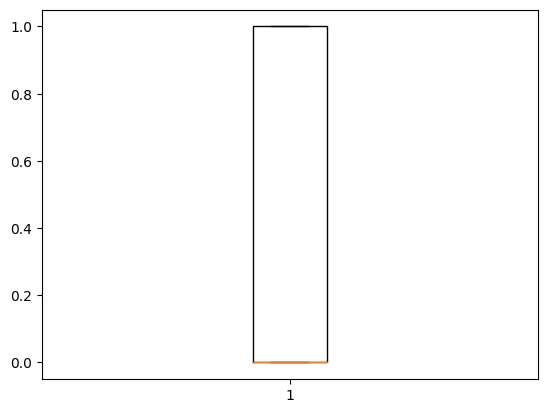

0.008388958138556859
-1.2254386767177095
count    8763.000000
mean        5.469702
std         2.859622
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Stress Level, dtype: float64


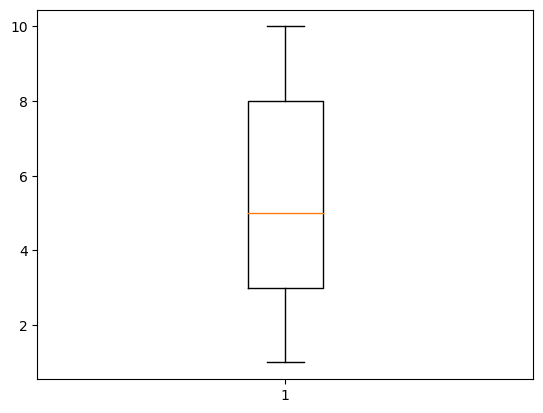

0.017974371497106203
-1.193478882228506
count    8763.000000
mean        5.993690
std         3.466359
min         0.001263
25%         2.998794
50%         5.933622
75%         9.019124
max        11.999313
Name: Sedentary Hours Per Day, dtype: float64


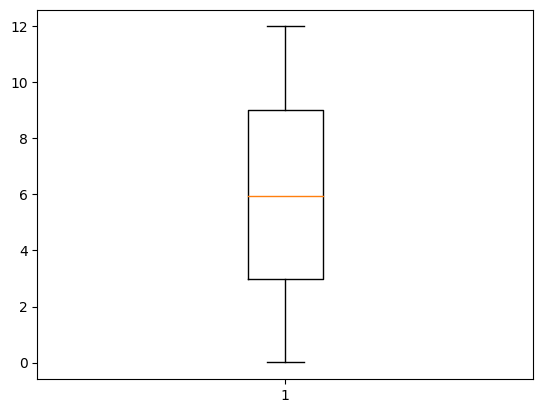

0.0217916598114287
-1.1819229604245485
count      8763.000000
mean     158263.181901
std       80575.190806
min       20062.000000
25%       88310.000000
50%      157866.000000
75%      227749.000000
max      299954.000000
Name: Income, dtype: float64


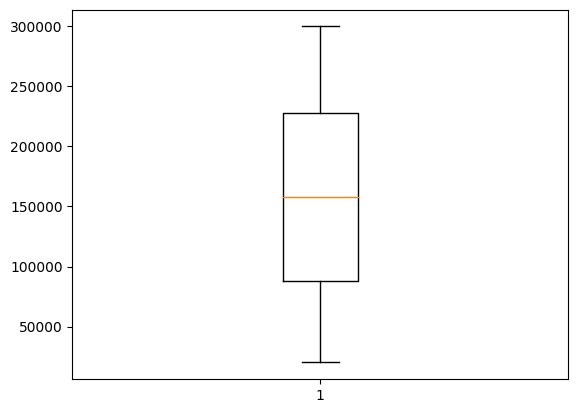

0.03599642172789989
-1.187976544639915
count    8763.000000
mean       28.891446
std         6.319181
min        18.002337
25%        23.422985
50%        28.768999
75%        34.324594
max        39.997211
Name: BMI, dtype: float64


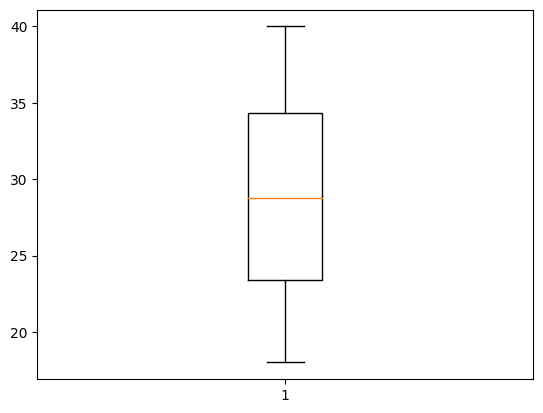

-0.0019149561400361409
-1.1977997105701434
count    8763.000000
mean      417.677051
std       223.748137
min        30.000000
25%       225.500000
50%       417.000000
75%       612.000000
max       800.000000
Name: Triglycerides( mg/dL), dtype: float64


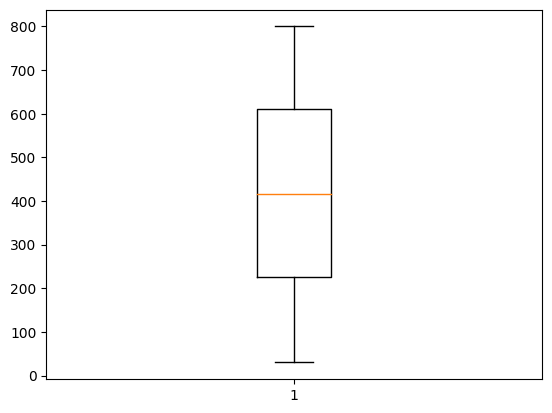

0.017821706108678503
-1.2295520823077493
count    8763.000000
mean        3.489672
std         2.282687
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         7.000000
Name: Physical Activity per week, dtype: float64


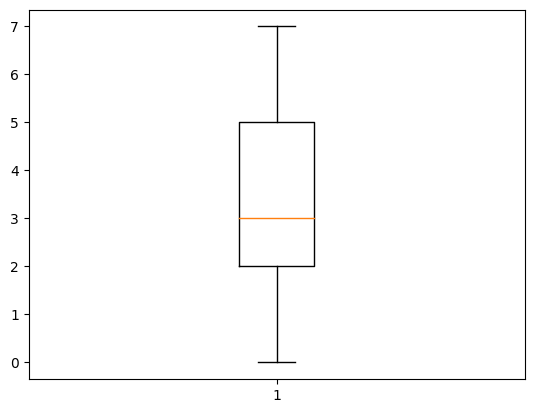

0.0003568517457889625
-1.232353858694743
count    8763.000000
mean        7.023508
std         1.988473
min         4.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: Sleep Hours Per Day, dtype: float64


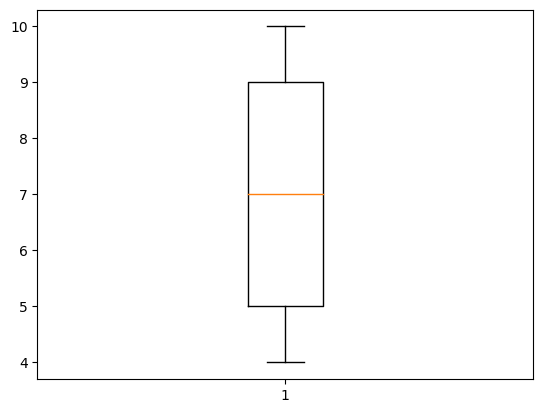

0.5915377010316499
-1.6504598886872839
count    8763.000000
mean        0.358211
std         0.479502
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Heart Attack Risk, dtype: float64


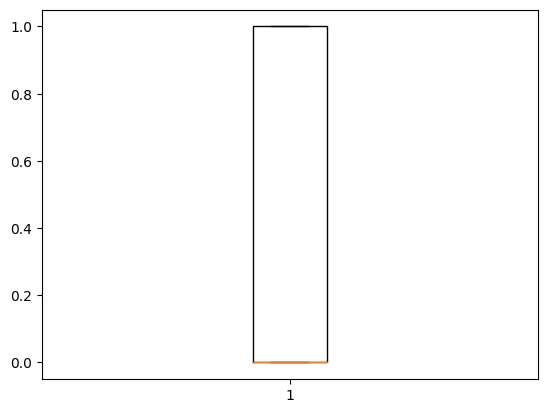

In [25]:
for i in df.select_dtypes(include='number').columns.values:
    print(df[i].skew())
    print(df[i].kurtosis())
    print(df[i].describe())
    plt.boxplot(df[i])
    plt.show()


In the context of the heart rate risk dataset, a box plot was generated to investigate the presence of outliers. The plot helps identify values that significantly deviate from the central tendency of the data. The "box" in the plot represents the interquartile range (IQR), encompassing the 25th (Q1) to 75th (Q3) percentiles, with a line denoting the median (Q2). Whiskers extend from the box to potential outliers, typically defined as values beyond 1.5 times the IQR.

Outliers in the dataset, if present, are data points lying outside the whiskers, suggesting unusual or extreme values that may require further investigation. Analyzing these outliers can provide valuable insights into the dataset's characteristics and potential anomalies, aiding in data quality assessment and decision-making processes.

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach to analyzing and visualizing data to understand its main characteristics, patterns, and trends. It involves examining the dataset's structure, identifying key features, and generating insights that can guide further analysis or decision-making. EDA is typically performed at the initial stages of data analysis to gain a preliminary understanding before applying more complex modeling or statistical techniques.

In [28]:
df.head(3)

,Age Group,Age,Gender,Cholesterol,Systolic BP,Diastolic BP,Heart Rate,Diabetes,Family History,Smoking,...,Sedentary Hours Per Day,Income,BMI,Triglycerides( mg/dL),Physical Activity per week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,Emerging adults,18,Male,396,110,101,45,0,0,1,...,10.322567,138696,31.714872,445,3,6,United Kingdom,Europe,Northern Hemisphere,0
1,Emerging adults,18,Female,214,179,88,68,0,0,0,...,5.714521,96215,18.314298,129,6,9,Colombia,South America,Northern Hemisphere,1
2,Emerging adults,18,Female,353,159,108,46,0,0,0,...,2.056841,82682,21.906630,455,0,8,France,Europe,Northern Hemisphere,0


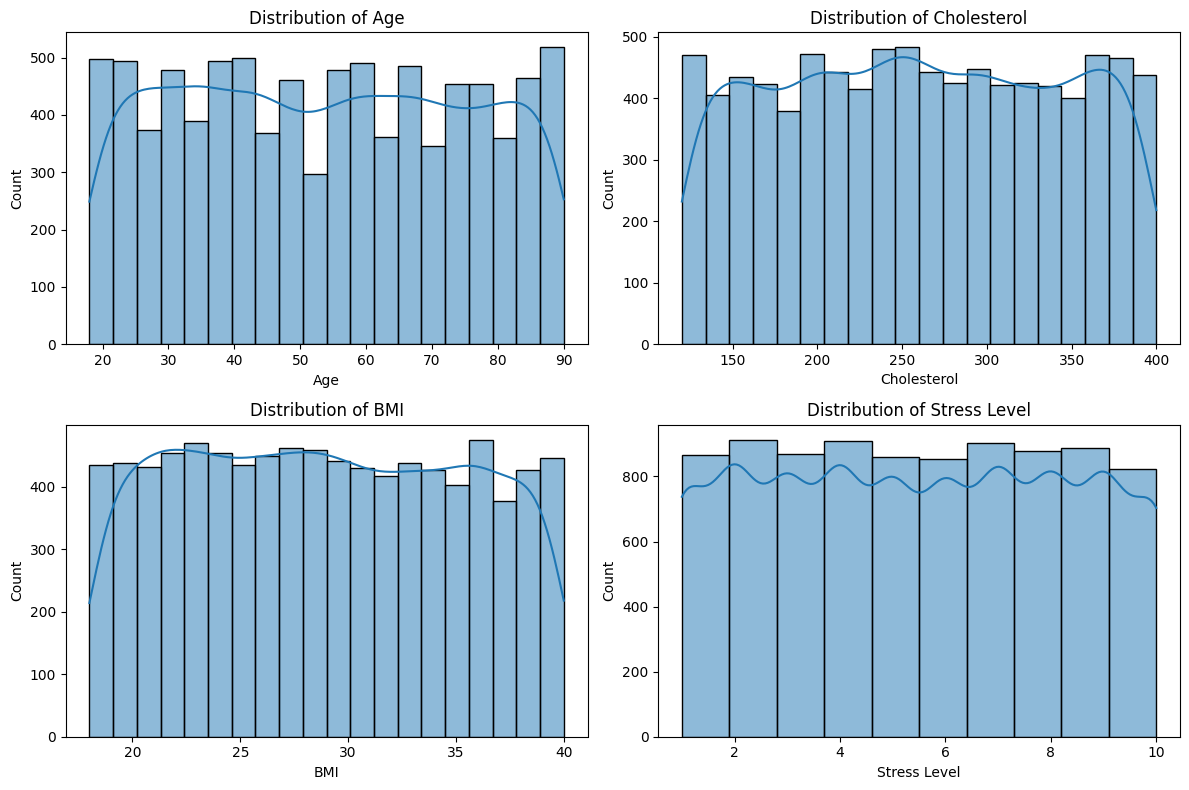

In [33]:
# Set a larger figure size for better visibility of plots
plt.figure(figsize=(12, 8))

# Distribution of Age
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')

# Distribution of Cholesterol
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Cholesterol', bins=20, kde=True)
plt.title('Distribution of Cholesterol')

# Distribution of BMI
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='BMI', bins=20, kde=True)
plt.title('Distribution of BMI')

# Distribution of Stress Level
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Stress Level', bins=10, kde=True)
plt.title('Distribution of Stress Level')

plt.tight_layout()
plt.show()


Its just an example of how to see the distribution of different variables. There can be many other important features added to see the distribution

In [27]:
df.dtypes

Age Group                      object
Age                             int64
Gender                         object
Cholesterol                     int64
Systolic BP                     int64
Diastolic BP                    int64
Heart Rate                      int64
Diabetes                        int64
Family History                  int64
Smoking                         int64
Obesity                         int64
Alcohol Consumption             int64
Exercise Hours Per Week       float64
Diet                           object
Previous Heart Problems         int64
Medication Use                  int64
Stress Level                    int64
Sedentary Hours Per Day       float64
Income                          int64
BMI                           float64
Triglycerides( mg/dL)           int64
Physical Activity per week      int64
Sleep Hours Per Day             int64
Country                        object
Continent                      object
Hemisphere                     object
Heart Attack

### Relationship with Target variable(Heart Attack Risk)

c:\Users\UMER COMPUTERS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


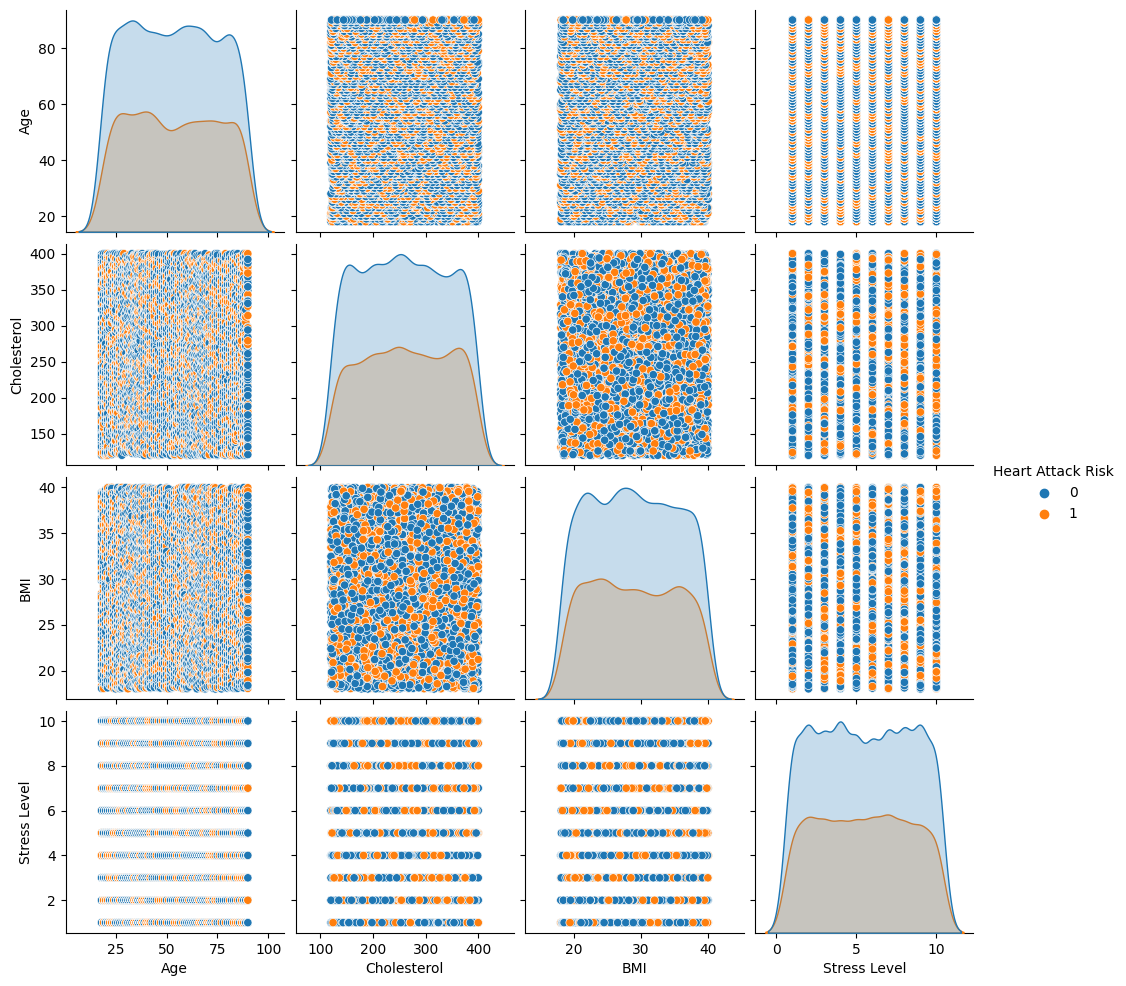

In [37]:
## Pairwise scatter plot

sns.pairplot(data = df, vars=['Age','Cholesterol','BMI','Stress Level'], hue= 'Heart Attack Risk',
             diag_kind='kde')
plt.show()

This line of code creates a scatter plot matrix for the specified variables, with the color of data points indicating different levels of 'Heart Attack Risk'. Additionally, KDE plots are used along the diagonal to show the estimated probability density function of each variable. This visualization can help in understanding the relationships and patterns between the selected variables and how they relate to the risk of heart attacks.







### Correlation Matrix
The purpose of a correlation matrix in machine learning is to quantify and visualize the strength and direction of linear relationships between pairs of features or variables within a dataset. It helps identify potential multicollinearity (high correlation between predictors), guiding feature selection, dimensionality reduction, and model building decisions.

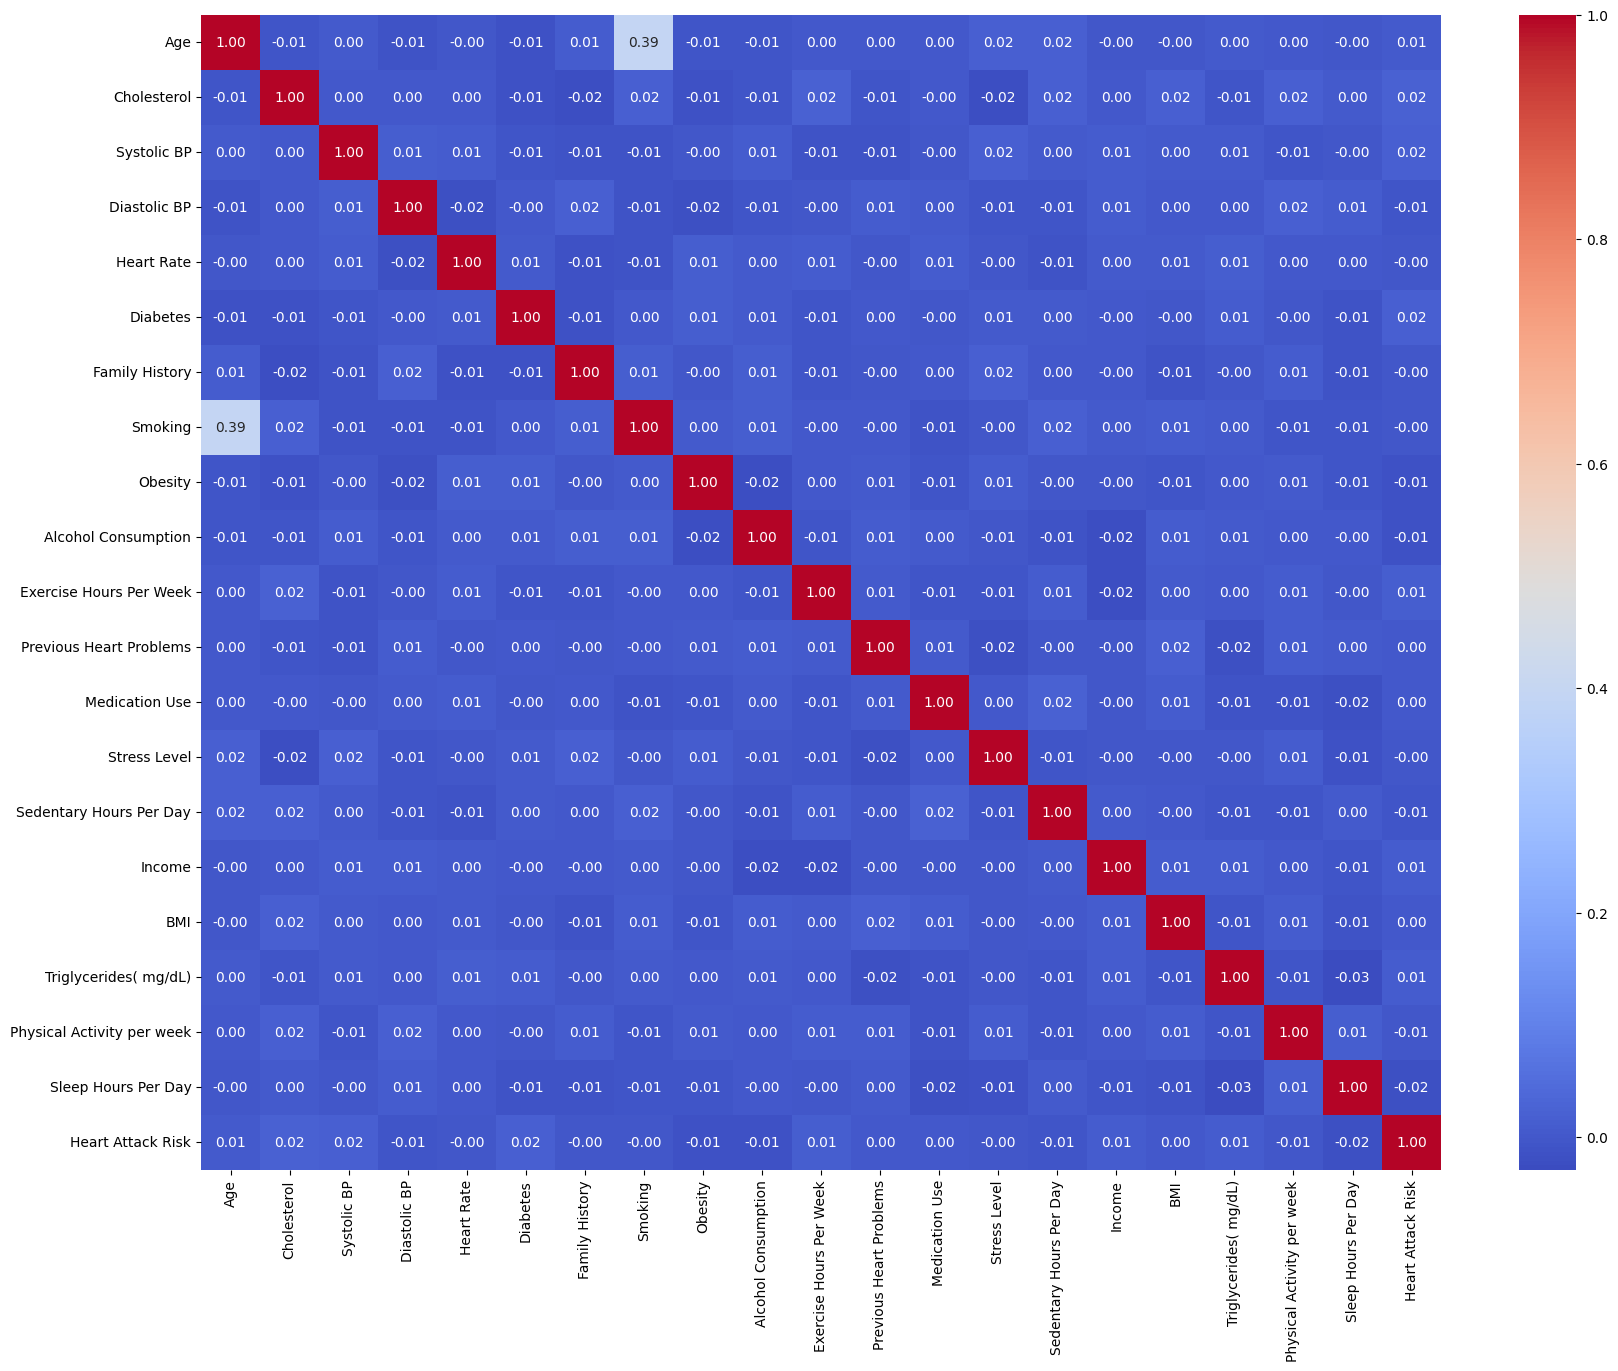

In [38]:
# Compute the correlation matrix

correlation_matrix = df.select_dtypes(include='number').corr()

# Visualize the correlation matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Highly correlated features in a dataset have a notable impact on various aspects of data analysis. Firstly, they introduce redundancy and repetitive information, making it challenging to distinguish the unique contributions of each feature. This redundancy can skew analysis results and mislead interpretations. Moreover, highly correlated features can cause overemphasis on certain variables, potentially distorting the analytical outcomes and inflating the perceived significance of relationships. In statistical analysis, the presence of high correlation may lead to inflated significance levels, potentially affecting hypothesis testing and inference. Models built with highly correlated features, especially in techniques like linear regression, may experience instability in parameter estimates, making them sensitive to minor variations in the dataset and affecting model reliability.

In [51]:
import plotly.express as px
# Dynamic and Interactive Correlation Matrix Heatmap
fig_corr_matrix = px.imshow(correlation_matrix,
                            x=correlation_matrix.columns,
                            y=correlation_matrix.columns,
                            color_continuous_scale='Greens',  
                            title='Interactive Correlation Matrix')

# Customize the layout
fig_corr_matrix.update_layout(width=1200, height=900)
fig_corr_matrix.show()

In [39]:
# Drop features that are highly correlated (threshold can be adjusted)
threshold = 0.8
corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            corr_features.add(colname)

df.drop(corr_features, axis=1, inplace=True)

## Data Preprocessing

### One-hot encoding 

One-hot encoding is a fundamental technique used in machine learning to transform categorical data into a numerical format that can be effectively utilized by various algorithms. In datasets, features often include categories or labels that are not inherently numerical, such as color, gender, or country. Machine learning models typically require numerical inputs, making it necessary to convert these categorical variables into a format that can be processed effectively.

In [52]:
df.dtypes

Age Group                      object
Age                             int64
Gender                         object
Cholesterol                     int64
Systolic BP                     int64
Diastolic BP                    int64
Heart Rate                      int64
Diabetes                        int64
Family History                  int64
Smoking                         int64
Obesity                         int64
Alcohol Consumption             int64
Exercise Hours Per Week       float64
Diet                           object
Previous Heart Problems         int64
Medication Use                  int64
Stress Level                    int64
Sedentary Hours Per Day       float64
Income                          int64
BMI                           float64
Triglycerides( mg/dL)           int64
Physical Activity per week      int64
Sleep Hours Per Day             int64
Country                        object
Continent                      object
Hemisphere                     object
Heart Attack

In [53]:
columns_to_encode = ['Age Group','Gender','Diet','Country','Continent','Hemisphere',]
df = pd.get_dummies(df, columns=columns_to_encode,drop_first=True)

After executing this code, the specified columns will be one-hot encoded, and the original columns will be replaced with the one-hot encoded columns. Each category within these columns will be represented by a binary column, indicating its presence (1) or absence (0). The first level of each categorical feature is dropped due to drop_first=True to prevent multicollinearity. This one-hot encoding is useful for preparing the data for machine learning algorithms that require numerical input.

In [54]:
df.head()

,Age,Cholesterol,Systolic BP,Diastolic BP,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Southern Hemisphere
0,18,396,110,101,45,0,0,1,0,1,...,False,True,False,False,False,False,True,False,False,False
1,18,214,179,88,68,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
2,18,353,159,108,46,0,0,0,1,0,...,False,False,False,False,False,False,True,False,False,False
3,18,356,137,64,48,0,0,0,0,1,...,False,False,False,False,True,False,False,False,False,False
4,18,163,142,67,51,1,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False


### Splitting the data into training and testing

In [65]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['Heart Attack Risk'])
y = df['Heart Attack Risk']
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.5,random_state=42)

### Noramlizing the data

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler  =MinMaxScaler()
df_scaled = scaler.fit_transform(x)
x = pd.DataFrame(df_scaled, columns=x.columns)


In [64]:
x

,Age,Cholesterol,Systolic BP,Diastolic BP,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Southern Hemisphere
0,0.0,0.985714,0.222222,0.82,0.071429,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.335714,0.988889,0.56,0.400000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.832143,0.766667,0.96,0.085714,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.842857,0.522222,0.08,0.114286,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.153571,0.577778,0.14,0.157143,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1.0,0.503571,0.133333,0.58,0.614286,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8759,1.0,0.296429,0.766667,0.10,0.100000,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8760,1.0,0.621429,0.177778,0.46,0.028571,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8761,1.0,0.903571,0.155556,0.18,0.300000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Dealing with Class imbalance 

In [66]:
#Use SMOTE for oversampling the data because of High Imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state= 42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

This code snippet utilizes the Synthetic Minority Over-sampling Technique (SMOTE) to address the issue of class imbalance in the training data. Class imbalance occurs when one class significantly outnumbers another in a binary classification problem, potentially leading to a biased model that performs well on the majority class but poorly on the minority class. SMOTE is an oversampling technique that aims to balance the class distribution by generating synthetic samples for the minority class.

### logistic Regression model

In [70]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 1000, penalty = 'l2', C = 1.0, solver = 'lbfgs')

LR.fit(x_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Model evaluation
y_pred = LR.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(report)

0.492925604746691
              precision    recall  f1-score   support

           0       0.63      0.50      0.56      2814
           1       0.35      0.48      0.40      1568

    accuracy                           0.49      4382
   macro avg       0.49      0.49      0.48      4382
weighted avg       0.53      0.49      0.50      4382



### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(x_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [74]:
# Model evaluation
y_pred = RF.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(accuracy)
print(report)

0.6024646280237335
              precision    recall  f1-score   support

           0       0.64      0.86      0.73      2814
           1       0.36      0.15      0.21      1568

    accuracy                           0.60      4382
   macro avg       0.50      0.50      0.47      4382
weighted avg       0.54      0.60      0.55      4382



## The Comparison

**Logistic Regression:**
The Logistic Regression model achieved an accuracy of approximately 49.3%. In terms of precision and recall, the model performed better for class 0 (precision: 63%, recall: 50%) compared to class 1 (precision: 35%, recall: 48%). The F1-score, which is a harmonic mean of precision and recall, was 0.56 for class 0 and 0.40 for class 1. The weighted average F1-score was around 0.50. These metrics indicate a modest performance of the Logistic Regression model, with a slightly better performance in identifying class 0 instances.

**Random Forest:**
On the other hand, the Random Forest model exhibited significantly better performance with an accuracy of about 60.2%. The precision and recall for class 0 were notably higher (precision: 64%, recall: 86%) compared to class 1 (precision: 36%, recall: 15%). The F1-score for class 0 was 0.73, indicating a good balance between precision and recall, while for class 1, the F1-score was lower at 0.21. The weighted average F1-score was around 0.55. These metrics demonstrate a substantially better performance of the Random Forest model, especially in correctly identifying instances of class 0.

**Comparison:**
The superior performance of Random Forest over Logistic Regression can be attributed to the inherent differences in these models. Logistic Regression is a linear model that tries to find a linear decision boundary in the feature space to classify data points. It works well when the relationship between features and the target variable is approximately linear. On the other hand, Random Forest is an ensemble model that builds multiple decision trees and aggregates their predictions, resulting in a more complex and flexible decision boundary. It can capture non-linear relationships and interactions between features more effectively. This is particularly advantageous when the true underlying relationship in the data is non-linear, as in many real-world scenarios.

[Data Source](https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset)
